In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.model_selection import train_test_split
from scipy import sparse

In [69]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau


from keras.layers.merge import dot
from keras.models import Model

Using TensorFlow backend.


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split
from numba import jit # Compile some functions when performance is critical
import keras
from keras.initializers import RandomNormal
from keras.models import Model, load_model, save_model
from keras.layers import Embedding, Input, Dense, Concatenate, Multiply, Flatten
from keras.optimizers import Adam
import tensorflow as tf

In [58]:
data1= pd.read_csv('BookDetails.csv')

In [30]:
data1

,Unnamed: 0,book_id,isbn,text_reviews_count,country_code,average_rating,link,authors,publisher,publication_year,image_url,ratings_count,title,genre,genre1
0,0,10365,375806814,7868,US,4.04,https://www.goodreads.com/book/show/10365.Wher...,"[{'author_id': '6810', 'role': ''}]",Yearling,2000.0,https://images.gr-assets.com/books/1166154337m...,271951,Where the Red Fern Grows,['children'],children
1,1,10959,1857993284,4324,US,3.88,https://www.goodreads.com/book/show/10959.Soph...,"[{'author_id': '1388082', 'role': ''}, {'autho...",Phoenix,1995.0,https://images.gr-assets.com/books/1343459906m...,111215,Sophie's World,['children'],children
2,2,5,043965548X,28561,US,4.53,https://www.goodreads.com/book/show/5.Harry_Po...,"[{'author_id': '1077326', 'role': ''}, {'autho...",Scholastic Inc.,2004.0,https://images.gr-assets.com/books/1499277281m...,1876252,Harry Potter and the Prisoner of Azkaban (Harr...,['children'],children
3,3,11387515,375869026,31536,US,4.43,https://www.goodreads.com/book/show/11387515-w...,"[{'author_id': '4859212', 'role': ''}]",Knopf,2012.0,https://images.gr-assets.com/books/1309285027m...,255461,Wonder (Wonder #1),"['children', 'young_adult']",children_YoungAdult
4,4,438492,64407683,3313,US,3.91,https://www.goodreads.com/book/show/438492.The...,"[{'author_id': '36746', 'role': ''}, {'author_...",HarperCollins Publishers,2000.0,https://images.gr-assets.com/books/1320705923m...,121250,The Wide Window (A Series of Unfortunate Event...,['children'],children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19288,19288,25698127,NaN,140,US,4.01,https://www.goodreads.com/book/show/25698127-y...,"[{'author_id': '14076277', 'role': ''}]",Penguin Teen Australia,2016.0,https://images.gr-assets.com/books/1433922022m...,533,Yellow,['young_adult'],YoungAdult
19289,19289,13919896,NaN,48,US,3.58,https://www.goodreads.com/book/show/13919896-g...,"[{'author_id': '4992850', 'role': ''}]",HarperTeen,2014.0,https://images.gr-assets.com/books/1369060906m...,177,Great,['young_adult'],YoungAdult
19290,19290,8129464,014132693X,229,US,4.07,https://www.goodreads.com/book/show/8129464-da...,"[{'author_id': '577975', 'role': ''}]",Puffin,2010.0,https://images.gr-assets.com/books/1338592847m...,3295,"Day of the Predator (TimeRiders, #2)",['young_adult'],YoungAdult
19291,19291,10860716,1554683394,78,US,3.84,https://www.goodreads.com/book/show/10860716-t...,"[{'author_id': '88922', 'role': ''}]",HarperCollins Canada,2011.0,https://images.gr-assets.com/books/1339611157m...,258,This Dark Endeavor (The Apprenticeship of Vict...,['young_adult'],YoungAdult


In [31]:
book = data1[['book_id','text_reviews_count','average_rating','publisher','publication_year',
             'ratings_count','genre1']]

In [32]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1
0,10365,7868,4.04,Yearling,2000.0,271951,children
1,10959,4324,3.88,Phoenix,1995.0,111215,children
2,5,28561,4.53,Scholastic Inc.,2004.0,1876252,children
3,11387515,31536,4.43,Knopf,2012.0,255461,children_YoungAdult
4,438492,3313,3.91,HarperCollins Publishers,2000.0,121250,children
...,...,...,...,...,...,...,...
19288,25698127,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult
19289,13919896,48,3.58,HarperTeen,2014.0,177,YoungAdult
19290,8129464,229,4.07,Puffin,2010.0,3295,YoungAdult
19291,10860716,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult


In [43]:
data1= pd.read_csv('UserInteractionV1.csv')

In [44]:
data2 = data1[['user_id','book_id','rating']]

In [46]:
data2 = data2.loc[:, ~data2.columns.str.contains('^Unnamed')]

In [75]:
users = data2.user_id.unique()
Books = data2.book_id.unique()

userid2idx = {o:i for i,o in enumerate(users)}
Bookid2idx = {o:i for i,o in enumerate(Books)}

In [48]:
data2['user_id'] = data2['user_id'].apply(lambda x: userid2idx[x])
data2['book_id'] = data2['book_id'].apply(lambda x: Bookid2idx[x])

In [76]:
book['book_id'] = book['book_id'].apply(lambda x: Bookid2idx[x])
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,features_genre
0,0,7868,4.04,Yearling,2000.0,271951,children,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,4324,3.88,Phoenix,1995.0,111215,children,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,28561,4.53,Scholastic Inc.,2004.0,1876252,children,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,3313,3.91,HarperCollins Publishers,2000.0,121250,children,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
19288,19288,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19289,19289,48,3.58,HarperTeen,2014.0,177,YoungAdult,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19290,19290,229,4.07,Puffin,2010.0,3295,YoungAdult,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19291,19291,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [13]:
data1

,Unnamed: 0,book_id,Unnamed: 0.1,user_id,timestamp,rating,has_spoiler
0,0,0,45,0,2017-03-22,5,False
1,1,0,9550,1,2013-01-27,5,False
2,2,0,44316,2,2015-05-28,5,False
3,3,0,62420,3,2011-05-20,5,False
4,4,0,68963,4,2011-11-13,5,False
...,...,...,...,...,...,...,...
1114794,1114794,19292,1048804,10800,2017-10-25,4,False
1114795,1114795,19292,1059546,11917,2017-08-17,4,True
1114796,1114796,19292,1109274,5572,2017-07-22,5,False
1114797,1114797,19292,1151507,11417,2017-10-23,4,True


In [14]:
df

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1
0,0,7868,4.04,Yearling,2000.0,271951,children
1,1,4324,3.88,Phoenix,1995.0,111215,children
2,2,28561,4.53,Scholastic Inc.,2004.0,1876252,children
3,3,31536,4.43,Knopf,2012.0,255461,children_young_adult
4,4,3313,3.91,HarperCollins Publishers,2000.0,121250,children
...,...,...,...,...,...,...,...
19288,19288,140,4.01,Penguin Teen Australia,2016.0,533,young_adult
19289,19289,48,3.58,HarperTeen,2014.0,177,young_adult
19290,19290,229,4.07,Puffin,2010.0,3295,young_adult
19291,19291,78,3.84,HarperCollins Canada,2011.0,258,young_adult


In [35]:
book['features_genre'] = book['genre1']

In [36]:
book['features_genre'] = book['features_genre'].map(lambda x: x.split('_'))

In [37]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,features_genre
0,0,7868,4.04,Yearling,2000.0,271951,children,[children]
1,1,4324,3.88,Phoenix,1995.0,111215,children,[children]
2,2,28561,4.53,Scholastic Inc.,2004.0,1876252,children,[children]
3,3,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,"[children, YoungAdult]"
4,4,3313,3.91,HarperCollins Publishers,2000.0,121250,children,[children]
...,...,...,...,...,...,...,...,...
19288,19288,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,[YoungAdult]
19289,19289,48,3.58,HarperTeen,2014.0,177,YoungAdult,[YoungAdult]
19290,19290,229,4.07,Puffin,2010.0,3295,YoungAdult,[YoungAdult]
19291,19291,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,[YoungAdult]


In [39]:
all_genres = set()
for row in book['features_genre']:
    # Union of sets is declared with the | operator
    all_genres = all_genres | set(row)
#all_genres.remove('') # Drop the empty genre

def invert_dict(d):
    return {value: key for key, value in d.items()}

all_genres = sorted(list(all_genres)) # We convert it to a list to enforce alphabetic ordering
ngenres = len(all_genres)

idx2genre = dict(enumerate(all_genres)) # Create a mapping dictionary from index to dict
genre2idx = invert_dict(idx2genre) # Inverse dict

genre2idx

{'YoungAdult': 0,
 'biography': 1,
 'children': 2,
 'comics-graphic': 3,
 'crime': 4,
 'fantasy': 5,
 'history': 6,
 'mystery': 7,
 'paranormal': 8,
 'poetry': 9,
 'romance': 10,
 'thriller': 11}

In [40]:
def encode_genres(genres):
    out = np.zeros(ngenres)
    for genre in genres:
        if genre == '':
            pass
        else:
            out[genre2idx[genre]] = 1
    return out.tolist()
book['features_genre'] = book['features_genre'].map(encode_genres)
book['features_genre']

0        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
19288    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19289    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19290    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19291    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19292    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: features_genre, Length: 19293, dtype: object

In [41]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,features_genre
0,0,7868,4.04,Yearling,2000.0,271951,children,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,4324,3.88,Phoenix,1995.0,111215,children,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,28561,4.53,Scholastic Inc.,2004.0,1876252,children,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,3313,3.91,HarperCollins Publishers,2000.0,121250,children,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
19288,19288,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19289,19289,48,3.58,HarperTeen,2014.0,177,YoungAdult,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19290,19290,229,4.07,Puffin,2010.0,3295,YoungAdult,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19291,19291,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [51]:
n_feats = len(book['features_genre'].iloc[0])

In [52]:
n_feats

12

In [53]:
data2 = data2.join(book['features_genre'], on = 'book_id').dropna()

In [55]:
data=data2

In [60]:
x0 = data['user_id'].to_numpy()
x1 =data['book_id'].to_numpy()



In [61]:
x2 = np.stack(data['features_genre'].to_numpy())

In [62]:
y = data['rating'].to_numpy()

(x0_train, x0_val,
 x1_train, x1_val,
 x2_train, x2_val,
 y_train, y_val) = train_test_split(x0, x1, x2, y,
                                    test_size = 0.1,
                                    random_state = 42)

x_train = [x0_train, x1_train, x2_train]
x_val = [x0_val, x1_val, x2_val]

In [63]:
def get_model(num_users, num_items, num_item_feats, mf_dim, layers = [64, 32, 16, 8]):
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')
    feats_input = Input(shape=(num_item_feats,), dtype='float32', name = 'feats_input')

    # User&Item Embeddings for Matrix Factorization
    MF_Embedding_User = Embedding(input_dim = num_users + 1, output_dim = mf_dim,
                                  name = 'user_embedding',
                                  embeddings_initializer = RandomNormal(stddev=0.001),
                                  input_length = 1)
    MF_Embedding_Item = Embedding(input_dim = num_items + 1, output_dim = mf_dim,
                                  name = 'item_embedding',
                                  embeddings_initializer = RandomNormal(stddev=0.001),
                                  input_length = 1)
    
    # User&Item Embeddings for MLP part
    MLP_Embedding_User = Embedding(input_dim = num_users + 1, output_dim = int(layers[0] / 2),
                                   name = 'mlp_embedding_user',
                                   embeddings_initializer = RandomNormal(stddev=0.001),
                                   input_length = 1)
    MLP_Embedding_Item = Embedding(input_dim = num_items + 1, output_dim = int(layers[0] / 2),
                                   name = 'mlp_embedding_item',
                                   embeddings_initializer = RandomNormal(stddev=0.001),
                                   input_length = 1) 
    
    mf_user_latent = Flatten()(MF_Embedding_User(user_input))
    mf_item_latent = Flatten()(MF_Embedding_Item(item_input))
    mf_vector = Multiply()([mf_user_latent, mf_item_latent])

    # MLP part with item features
    mlp_user_latent = Flatten()(MLP_Embedding_User(user_input))
    mlp_item_latent = Flatten()(MLP_Embedding_Item(item_input))
    
    mlp_vector = Concatenate()([mlp_user_latent, mlp_item_latent, feats_input])
    for l in layers:
        layer = Dense(l, activation='relu')
        mlp_vector = layer(mlp_vector)

    # Concatenate MF and MLP parts
    predict_vector = Concatenate()([mf_vector, mlp_vector])
    
    # Final prediction layer
    prediction = Dense(1, activation = 'sigmoid',
                       kernel_initializer = 'lecun_uniform',
                       name = 'prediction')(predict_vector)
    
    model = Model(input = [user_input, item_input, feats_input], output = prediction)
    return model

In [64]:
learning_rate = 0.001
batch_size = 256
n_epochs = 3
mf_dim = 15
layers = [128, 64, 32, 16, 8]

In [67]:
n_users=len(users)
n_book=len(Books)

In [72]:
model = get_model(n_users, n_book, n_feats, mf_dim, layers)
model.compile(optimizer = Adam(lr = learning_rate), loss = 'mean_squared_logarithmic_error')

In [73]:
hist = model.fit(x = x_train, y = y_train, validation_data = (x_val, y_val),
                 batch_size = batch_size, epochs = n_epochs, verbose = True, shuffle = True)

Train on 1003319 samples, validate on 111480 samples
Epoch 1/3
1003319/1003319 [==============================] - 75s 75us/step - loss: 0.7910 - val_loss: 0.7830
Epoch 2/3
1003319/1003319 [==============================] - 81s 81us/step - loss: 0.7843 - val_loss: 0.7832
Epoch 3/3
1003319/1003319 [==============================] - 121s 120us/step - loss: 0.7840 - val_loss: 0.7833


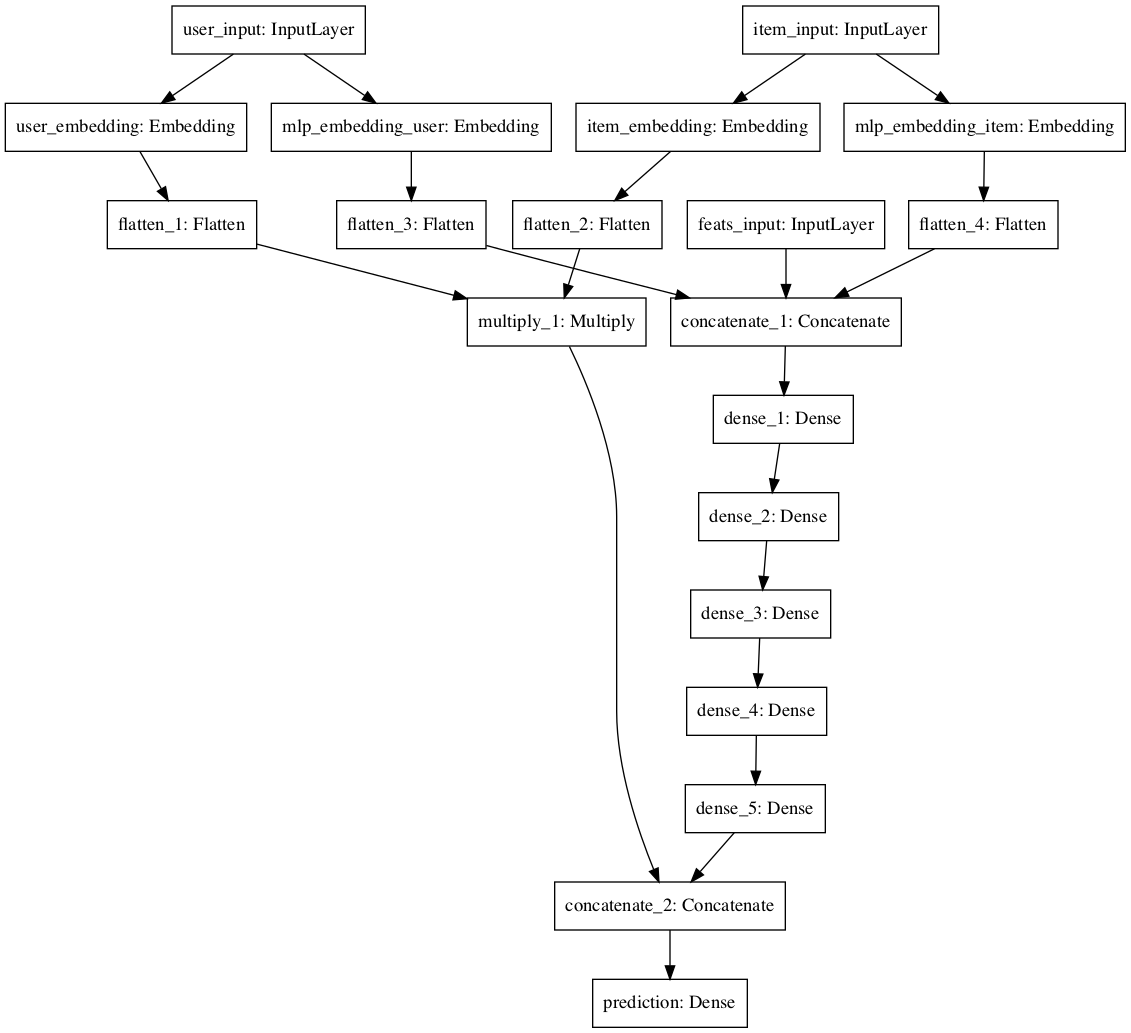

In [74]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')